In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Flatten, MaxPooling2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

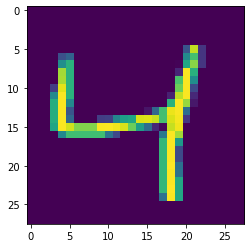

In [8]:
(X_train,Y_train), (X_test,Y_test) = mnist.load_data() #60000 images for training + 10000 images for testing
                                                       #Image size = 28 x 28

plt.imshow(X_train[2])

X_test = X_test.reshape(10000,28,28,1) 
X_train = X_train.reshape(60000,28,28,1)

Y_train = to_categorical(Y_train)   #one-hot encode target collumn
Y_test = to_categorical(Y_test)

In [4]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64,kernel_size=(3,3), activation='relu', input_shape= (28,28,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

#compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                15690     
Total params: 34,794
Trainable params: 34,794
Non-trainable params: 0
____________________________________________________

In [19]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0494 - accuracy: 0.9852 - val_loss: 0.0654 - val_accuracy: 0.9800
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0442 - accuracy: 0.9863 - val_loss: 0.0586 - val_accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0411 - accuracy: 0.9877 - val_loss: 0.0657 - val_accuracy: 0.9822
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0507 - val_accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.0627 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0323 - accuracy: 0.9906 - val_loss: 0.0643 - val_accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0277 - accuracy: 0.9923 - val_loss: 0.0844 -

In [20]:
loss, acc = model.evaluate(X_test, Y_test)
print("Loss = ",loss)
print("Accuracy = ",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0981 - accuracy: 0.9815
Loss =  0.09809660911560059
Accuracy =  0.9815000295639038


In [45]:
print("Predict the first number in test set: ",np.argmax(model.predict(X_test[:1]), axis=1))
print("The first number in test set: ")
print(Y_test[:1])

Predict the first number in test set:  [7]
The first 2 numbers in test set: 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


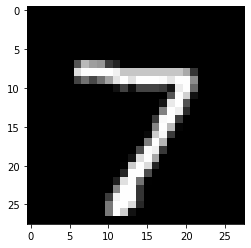

In [46]:
for i in range(0,1):   
    image = X_test[i]   
    image = np.array(image, dtype='float')   
    pixels = image.reshape((28,28))  
    plt.imshow(pixels, cmap='gray')   
    plt.show()